In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [77]:
df = pd.read_csv('../datasets/merged/master_improved.csv', index_col=0, parse_dates=True)
selected_cols = ['btc_close', 'active_addresses', 'dxy_close', 'eth_close',
                 'fear_greed', 'gold_close', 'interest_rate', 'sp500_close', 'trend']
df = df[selected_cols].dropna()

In [78]:
# Escalar todos los datos
df_copy = df.copy()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_copy)

In [67]:
# --- Crear generadores ---
SEQ_LEN = 30
split = int(len(scaled) * 0.8)

train_data = scaled[:split]
test_data  = scaled[split:]

train_generator = TimeseriesGenerator(train_data, train_data[:, 0], length=SEQ_LEN, batch_size=16)
test_generator  = TimeseriesGenerator(test_data,  test_data[:, 0], length=SEQ_LEN, batch_size=16)

In [68]:
train_data

array([[0.05472122, 0.34458647, 0.00313487, ..., 0.2594697 , 0.14963335,
        0.34444444],
       [0.05158768, 0.34458647, 0.02390284, ..., 0.2594697 , 0.13431368,
        0.34444444],
       [0.05476152, 0.19629601, 0.02390284, ..., 0.2594697 , 0.13431368,
        0.34444444],
       ...,
       [0.37589864, 0.60560192, 0.51371467, ..., 1.        , 0.6443284 ,
        0.38888889],
       [0.37351606, 0.60560192, 0.51371467, ..., 1.        , 0.6443284 ,
        0.38888889],
       [0.36684464, 0.60560192, 0.51371467, ..., 1.        , 0.6443284 ,
        0.37777778]])

In [69]:
model = Sequential([
    Input(shape=(SEQ_LEN, train_data.shape[1])),
    LSTM(50, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 50)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,051 (47.07 KB)

 Trainable params: 12,051 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
history = model.fit(train_generator, epochs=20)

Epoch 1/20


/Users/cbarril/dev/posgrado/tp_ast1_19co2024/ast1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0010
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.0880e-04
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0011
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.8055e-04
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.6248e-04
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0454e-04
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.0768e-04
Epoch 9/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7041e-04
Epoch 10/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.6473e-04
Epoch 11/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.2502e-04
Epoch 12/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3792e-04
Epoch 13/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4726e-04
Epoch 14/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6709e-04
Epoch 15/20
133/133 ━━━━

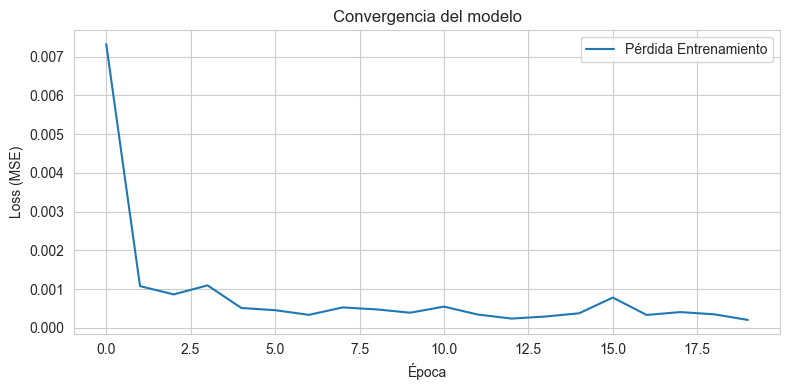

In [72]:
# --- Graficar convergencia del entrenamiento ---
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Loss (MSE)')
plt.title('Convergencia del modelo')
plt.legend()
plt.tight_layout()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
📊 MAE:  7417.694415
📊 RMSE: 9002.702895


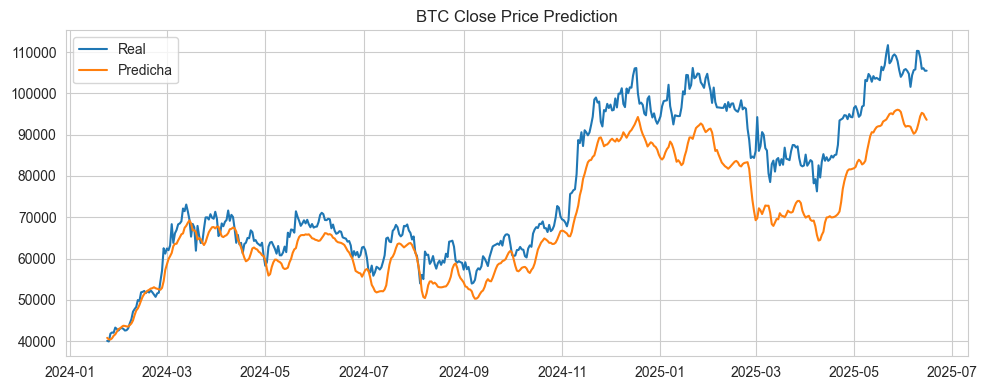

In [76]:
# ---------- Predicción más rápida ----------
pred = model.predict(test_generator, verbose=1)   # verbose=1 → barra de progreso

# ---------- y_test directo, sin volver a iterar ----------
# El target de cada muestra está en test_data[:, 0]
# Para alinearlo con el generador (que salta las primeras SEQ_LEN filas):
y_test = test_data[SEQ_LEN:, 0]

test_dates = df.index[split + SEQ_LEN:]

# ---------- Des‑escalar ----------
btc_scaler = MinMaxScaler()
btc_scaler.min_, btc_scaler.scale_ = scaler.min_[0], scaler.scale_[0]
y_test_inv = btc_scaler.inverse_transform(y_test.reshape(-1, 1))
pred_inv   = btc_scaler.inverse_transform(pred)

# ---------- Métricas ----------
mae = mean_absolute_error(y_test_inv, pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, pred_inv))

print(f"📊 MAE:  {mae:.6f}")
print(f"📊 RMSE: {rmse:.6f}")

# ---------- Gráfica ----------
plt.figure(figsize=(10, 4))
plt.plot(test_dates, y_test_inv, label='Real')
plt.plot(test_dates, pred_inv, label='Predicha')
plt.title('BTC Close Price Prediction')
plt.legend()
plt.tight_layout()
plt.show()

In [79]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Sequential

df_copy = df.copy()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_copy)

SEQ_LEN = 30
split = int(len(scaled) * 0.8)

train_data = scaled[:split]
test_data  = scaled[split:]

train_generator = TimeseriesGenerator(train_data, train_data[:, 0], length=SEQ_LEN, batch_size=16)
test_generator  = TimeseriesGenerator(test_data,  test_data[:, 0], length=SEQ_LEN, batch_size=16)

model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True, activation='tanh'), input_shape=(SEQ_LEN, train_data.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

/Users/cbarril/dev/posgrado/tp_ast1_19co2024/ast1/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


/Users/cbarril/dev/posgrado/tp_ast1_19co2024/ast1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0309
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0046
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0031
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0030
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0024
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0016
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0014
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0011
Epoch 9/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0012
Epoch 10/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0011
Epoch 11/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0015
Epoch 12/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0011
Epoch 13/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 8.1234e-04
Epoch 14/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0012
Epoch 15/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/s

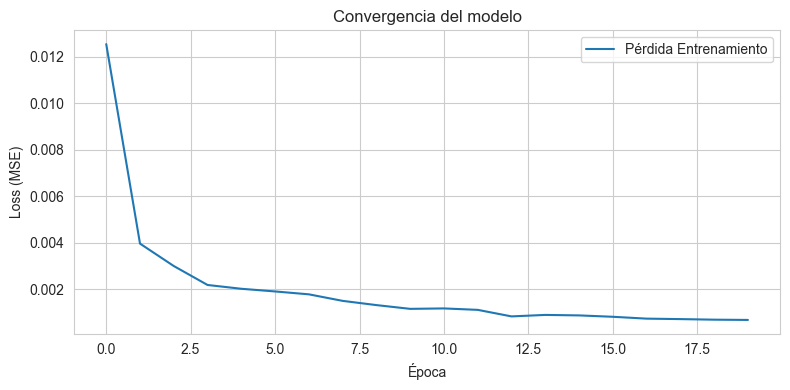

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
📊 MAE:  9702.604862
📊 RMSE: 11543.063905


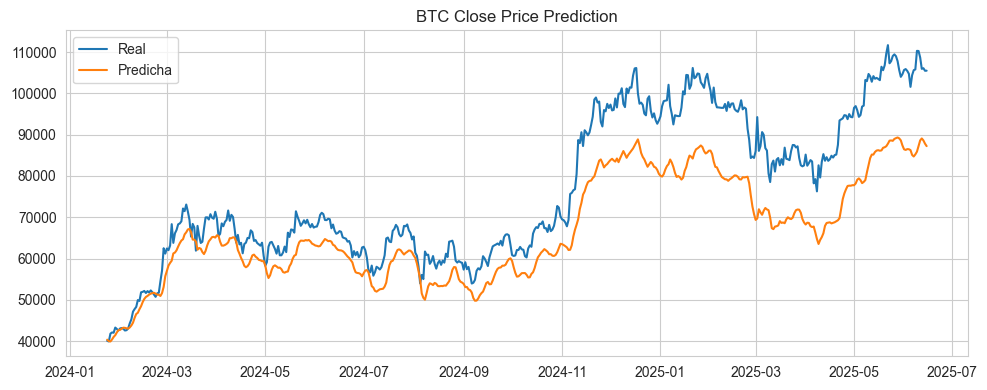

In [80]:
history = model.fit(train_generator, epochs=20)

# --- Graficar convergencia del entrenamiento ---
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Loss (MSE)')
plt.title('Convergencia del modelo')
plt.legend()
plt.tight_layout()
plt.show()

# ---------- Predicción más rápida ----------
pred = model.predict(test_generator, verbose=1)   # verbose=1 → barra de progreso

# ---------- y_test directo, sin volver a iterar ----------
# El target de cada muestra está en test_data[:, 0]
# Para alinearlo con el generador (que salta las primeras SEQ_LEN filas):
y_test = test_data[SEQ_LEN:, 0]

test_dates = df.index[split + SEQ_LEN:]

# ---------- Des‑escalar ----------
btc_scaler = MinMaxScaler()
btc_scaler.min_, btc_scaler.scale_ = scaler.min_[0], scaler.scale_[0]
y_test_inv = btc_scaler.inverse_transform(y_test.reshape(-1, 1))
pred_inv   = btc_scaler.inverse_transform(pred)

# ---------- Métricas ----------
mae = mean_absolute_error(y_test_inv, pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, pred_inv))

print(f"📊 MAE:  {mae:.6f}")
print(f"📊 RMSE: {rmse:.6f}")

# ---------- Gráfica ----------
plt.figure(figsize=(10, 4))
plt.plot(test_dates, y_test_inv, label='Real')
plt.plot(test_dates, pred_inv, label='Predicha')
plt.title('BTC Close Price Prediction')
plt.legend()
plt.tight_layout()
plt.show()